In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading the data

In [3]:
# Attempt to load the data using a different encoding
try:
    youtube_data = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding="ISO-8859-1")
    first_rows = youtube_data.head()
except Exception as e:
    first_rows = str(e)

first_rows

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# 2. Some Basic Statistics

In [4]:
# Check for missing values
missing_values = youtube_data.isnull().sum()

# Get basic statistics for numerical columns
basic_statistics = youtube_data.describe()

missing_values, basic_statistics

(rank                                         0
 Youtuber                                     0
 subscribers                                  0
 video views                                  0
 category                                    46
 Title                                        0
 uploads                                      0
 Country                                    122
 Abbreviation                               122
 channel_type                                30
 video_views_rank                             1
 country_rank                               116
 channel_type_rank                           33
 video_views_for_the_last_30_days            56
 lowest_monthly_earnings                      0
 highest_monthly_earnings                     0
 lowest_yearly_earnings                       0
 highest_yearly_earnings                      0
 subscribers_for_last_30_days               337
 created_year                                 5
 created_month                          

* There are 995 entries in the dataset.
* The rank column ranges from 1 to 995, representing the ranking of YouTube channels.
* The average number of subscribers is approximately 22.98 million, with a maximum of 245 million.
* On average, channels have uploaded around 9,187 videos.
* The video views column indicates the total number of views a channel has received. The average is about 11.04 billion views.
* The Population column has an average of about 430.39 million, which provides country-specific data related to the YouTube channels.
* Other columns like Unemployment rate, Latitude, and Longitude provide additional insights into the country from which the YouTube channel originates.

# 3. Some Basic Visualizations

<Figure size 640x480 with 0 Axes>

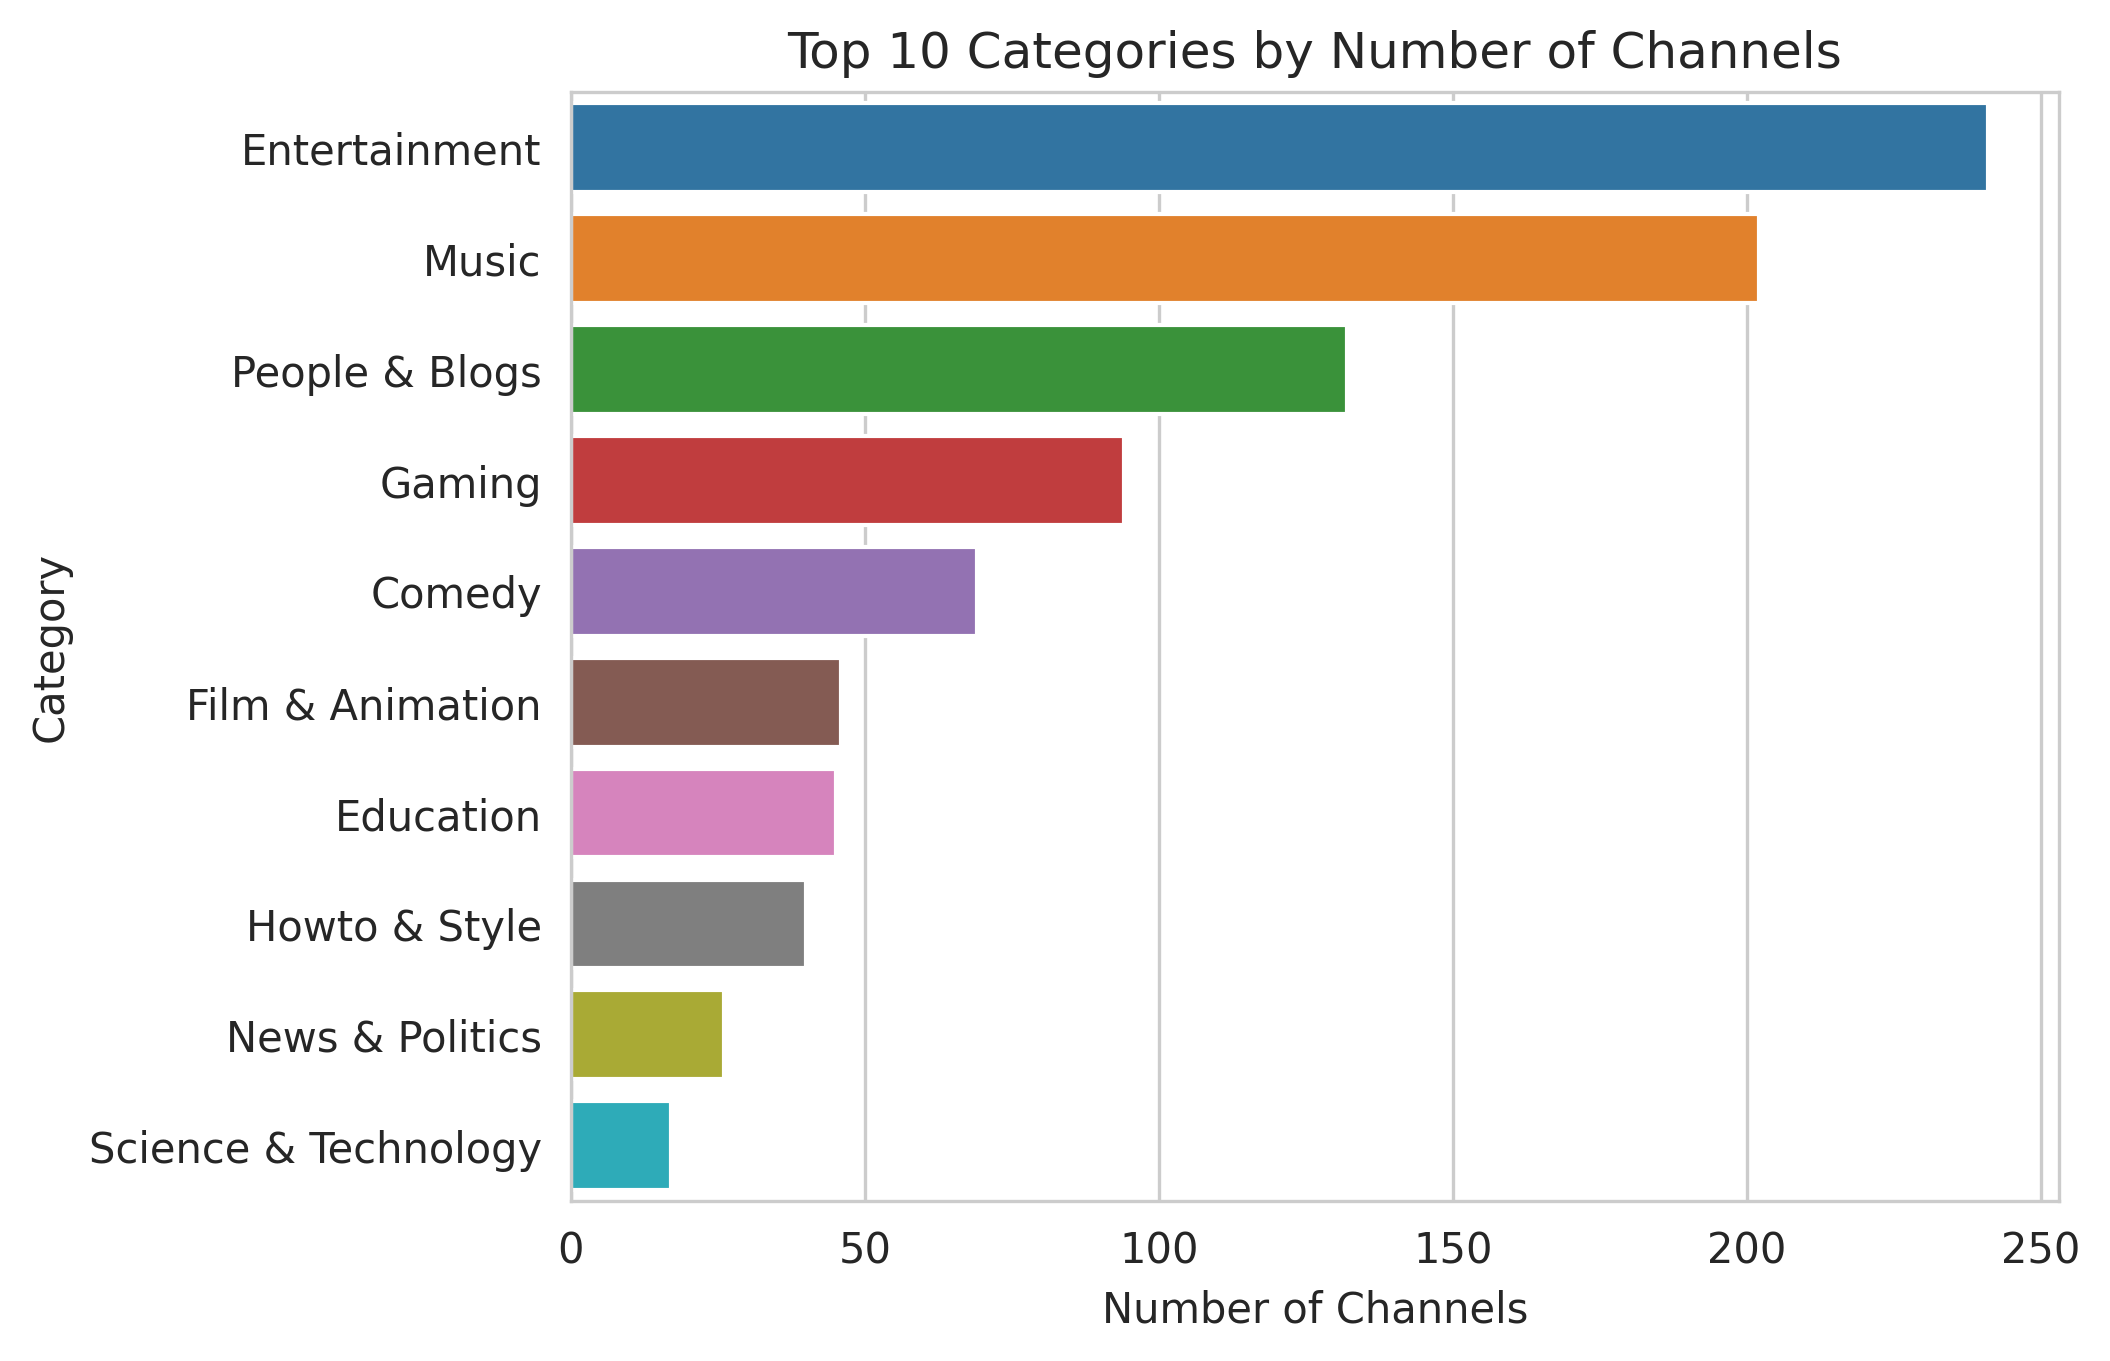

<Figure size 640x480 with 0 Axes>

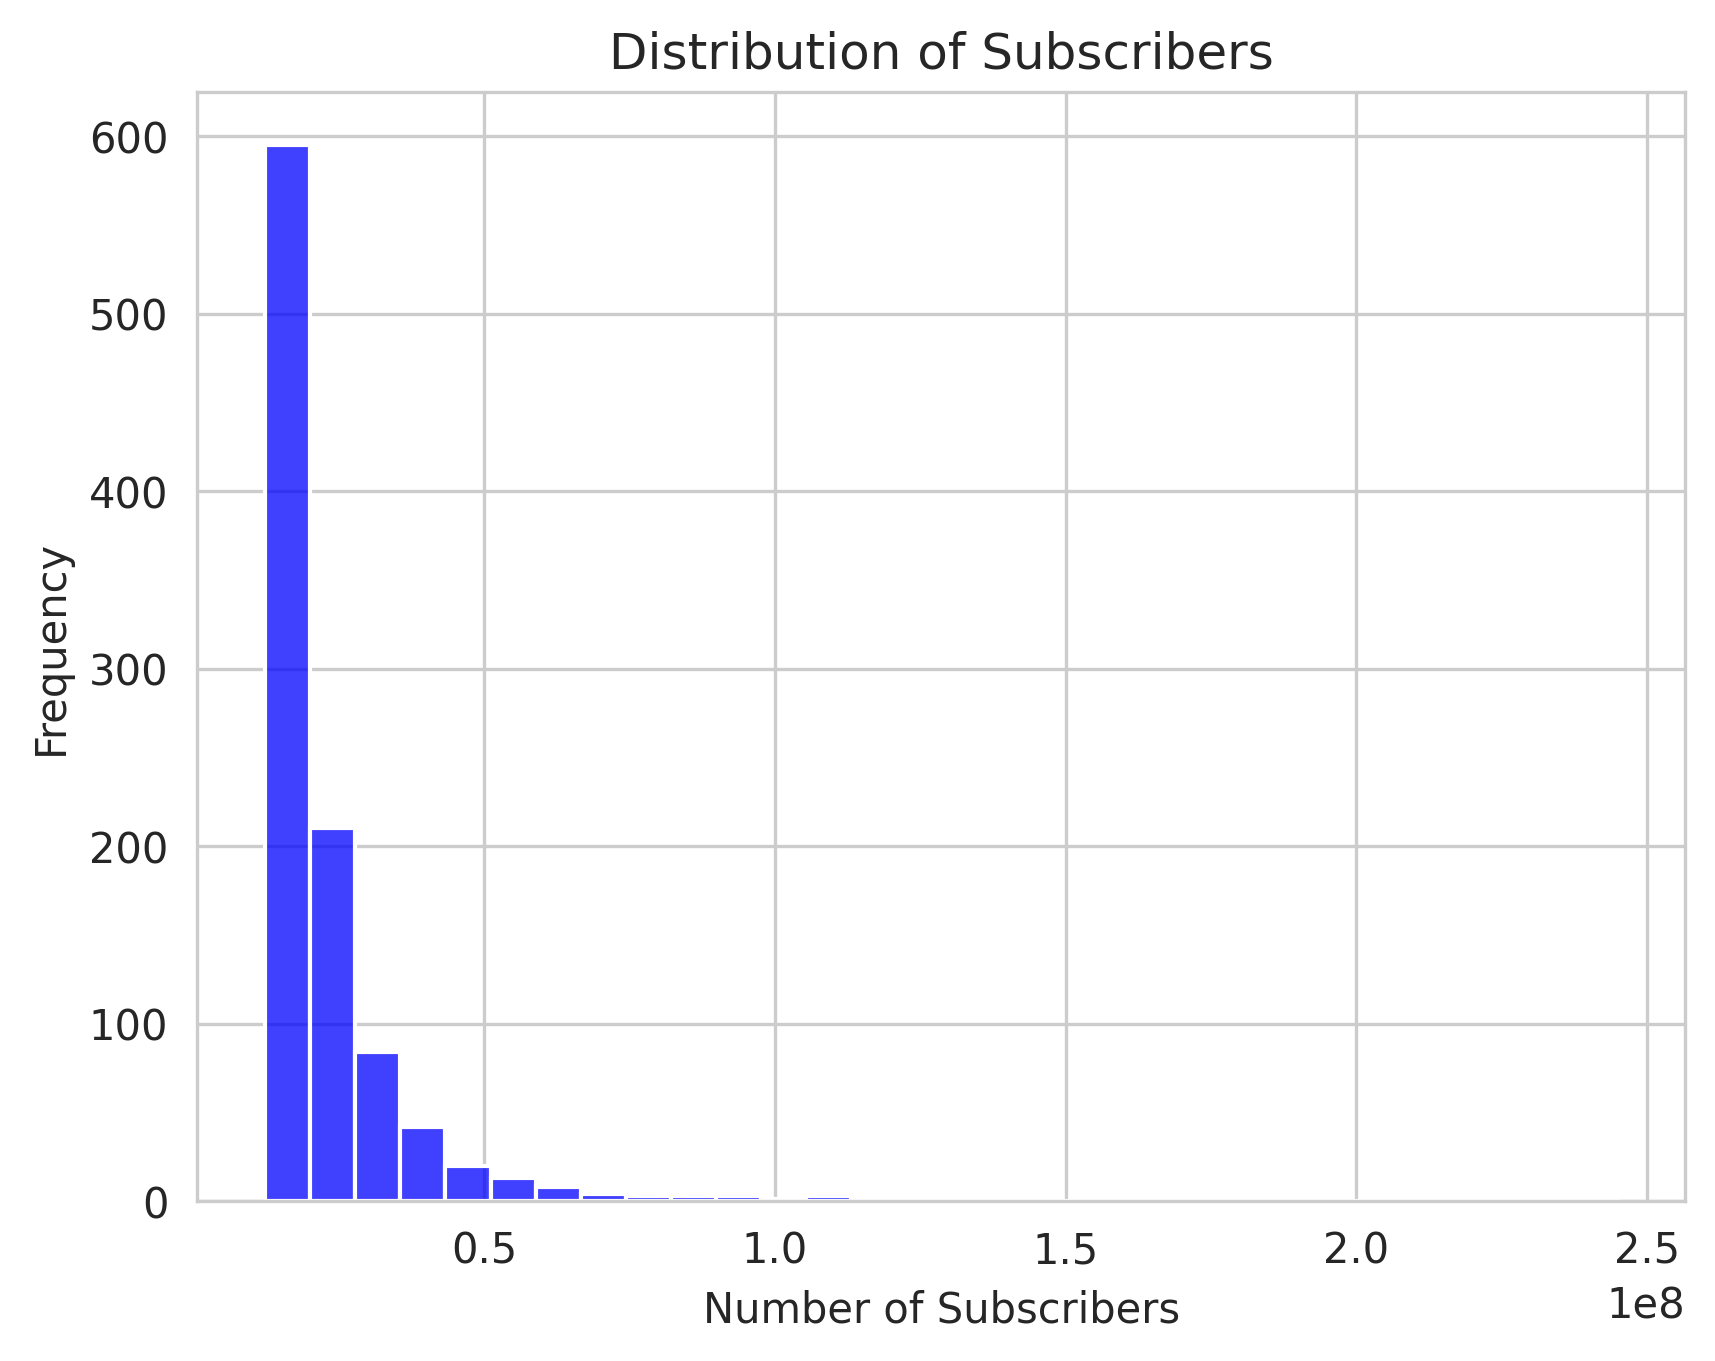

<Figure size 640x480 with 0 Axes>

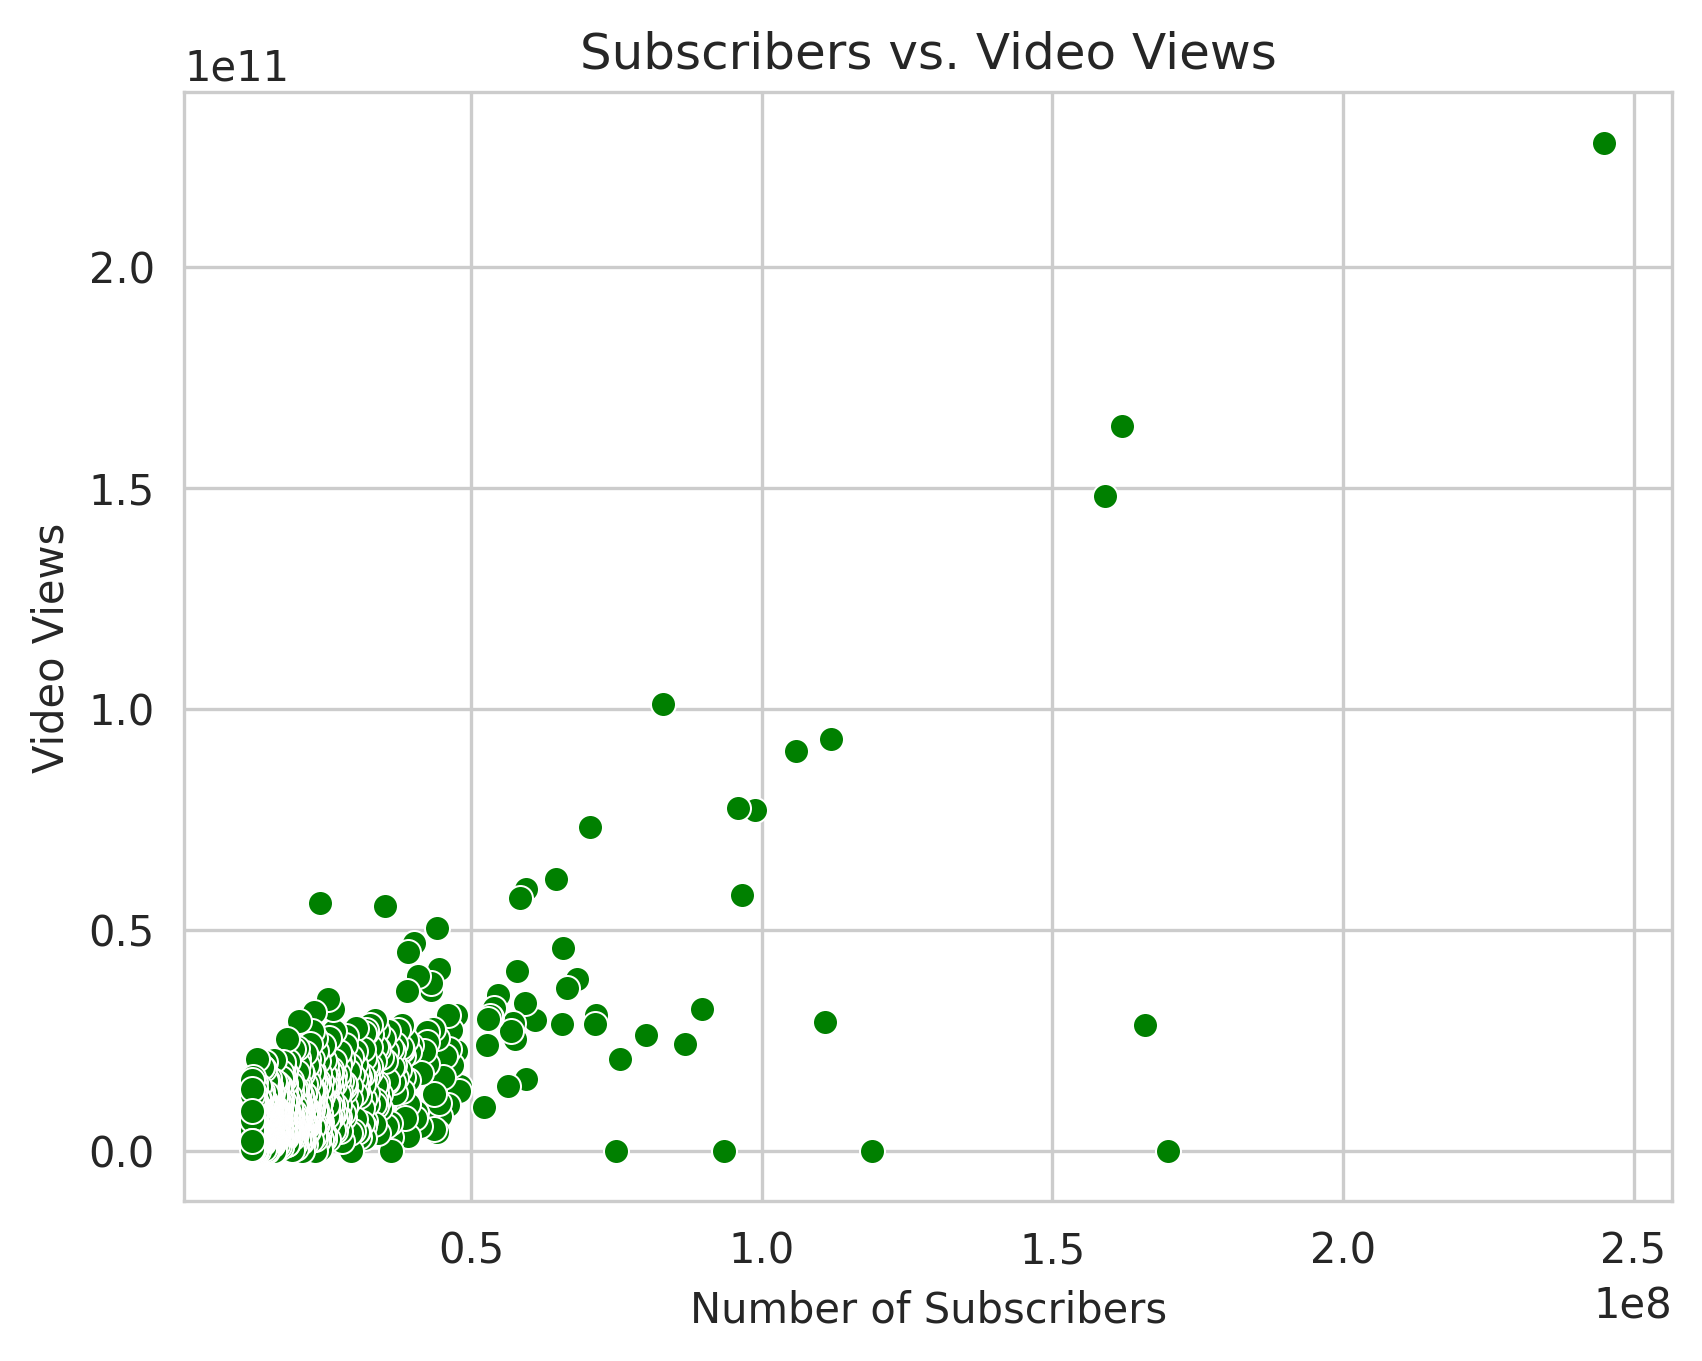

<Figure size 640x480 with 0 Axes>

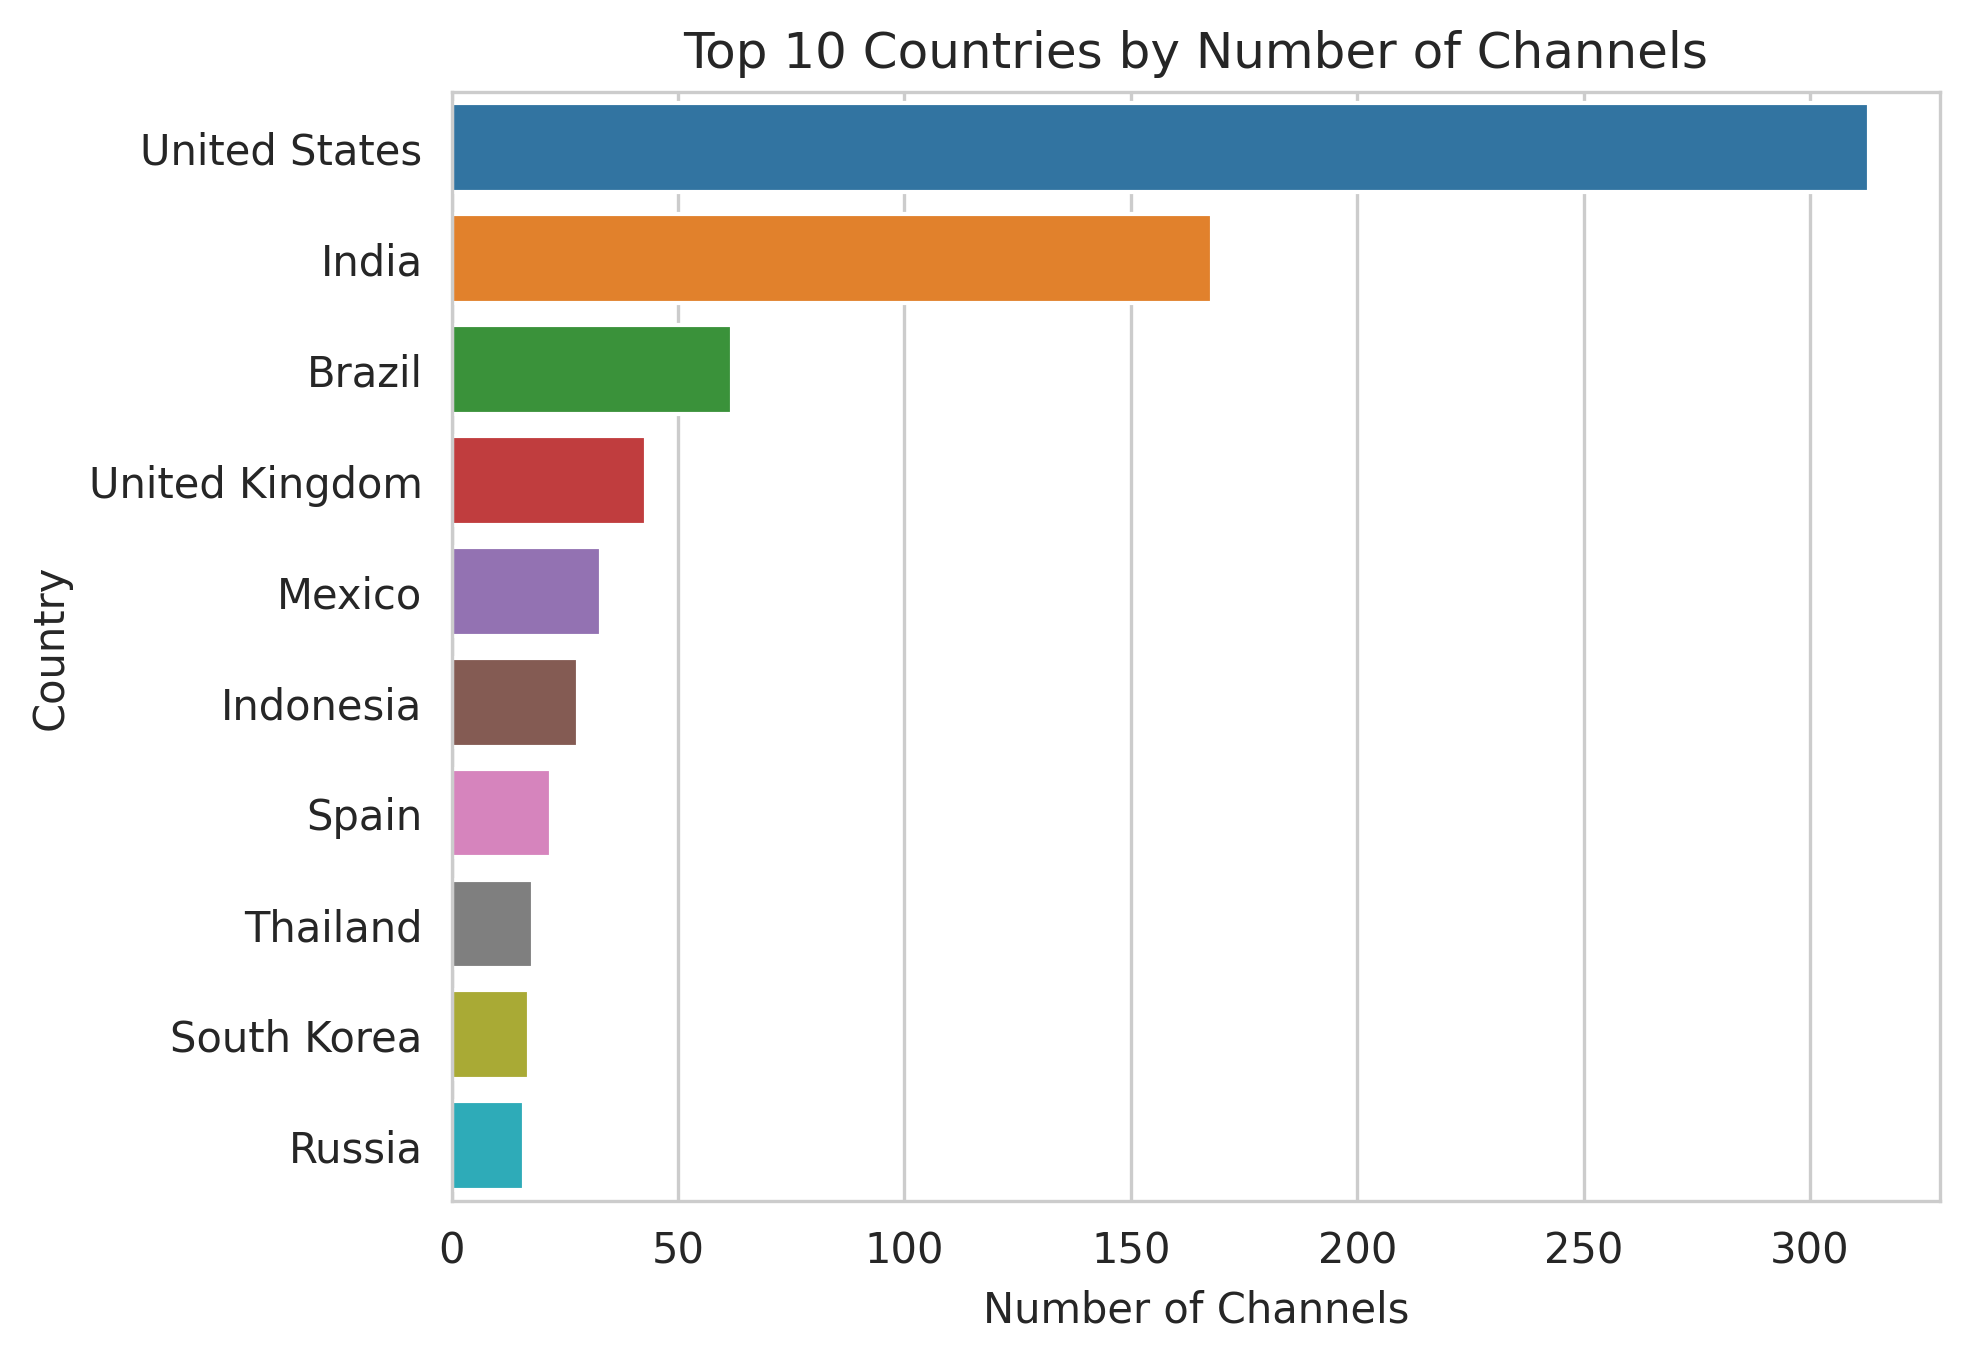

<Figure size 640x480 with 0 Axes>

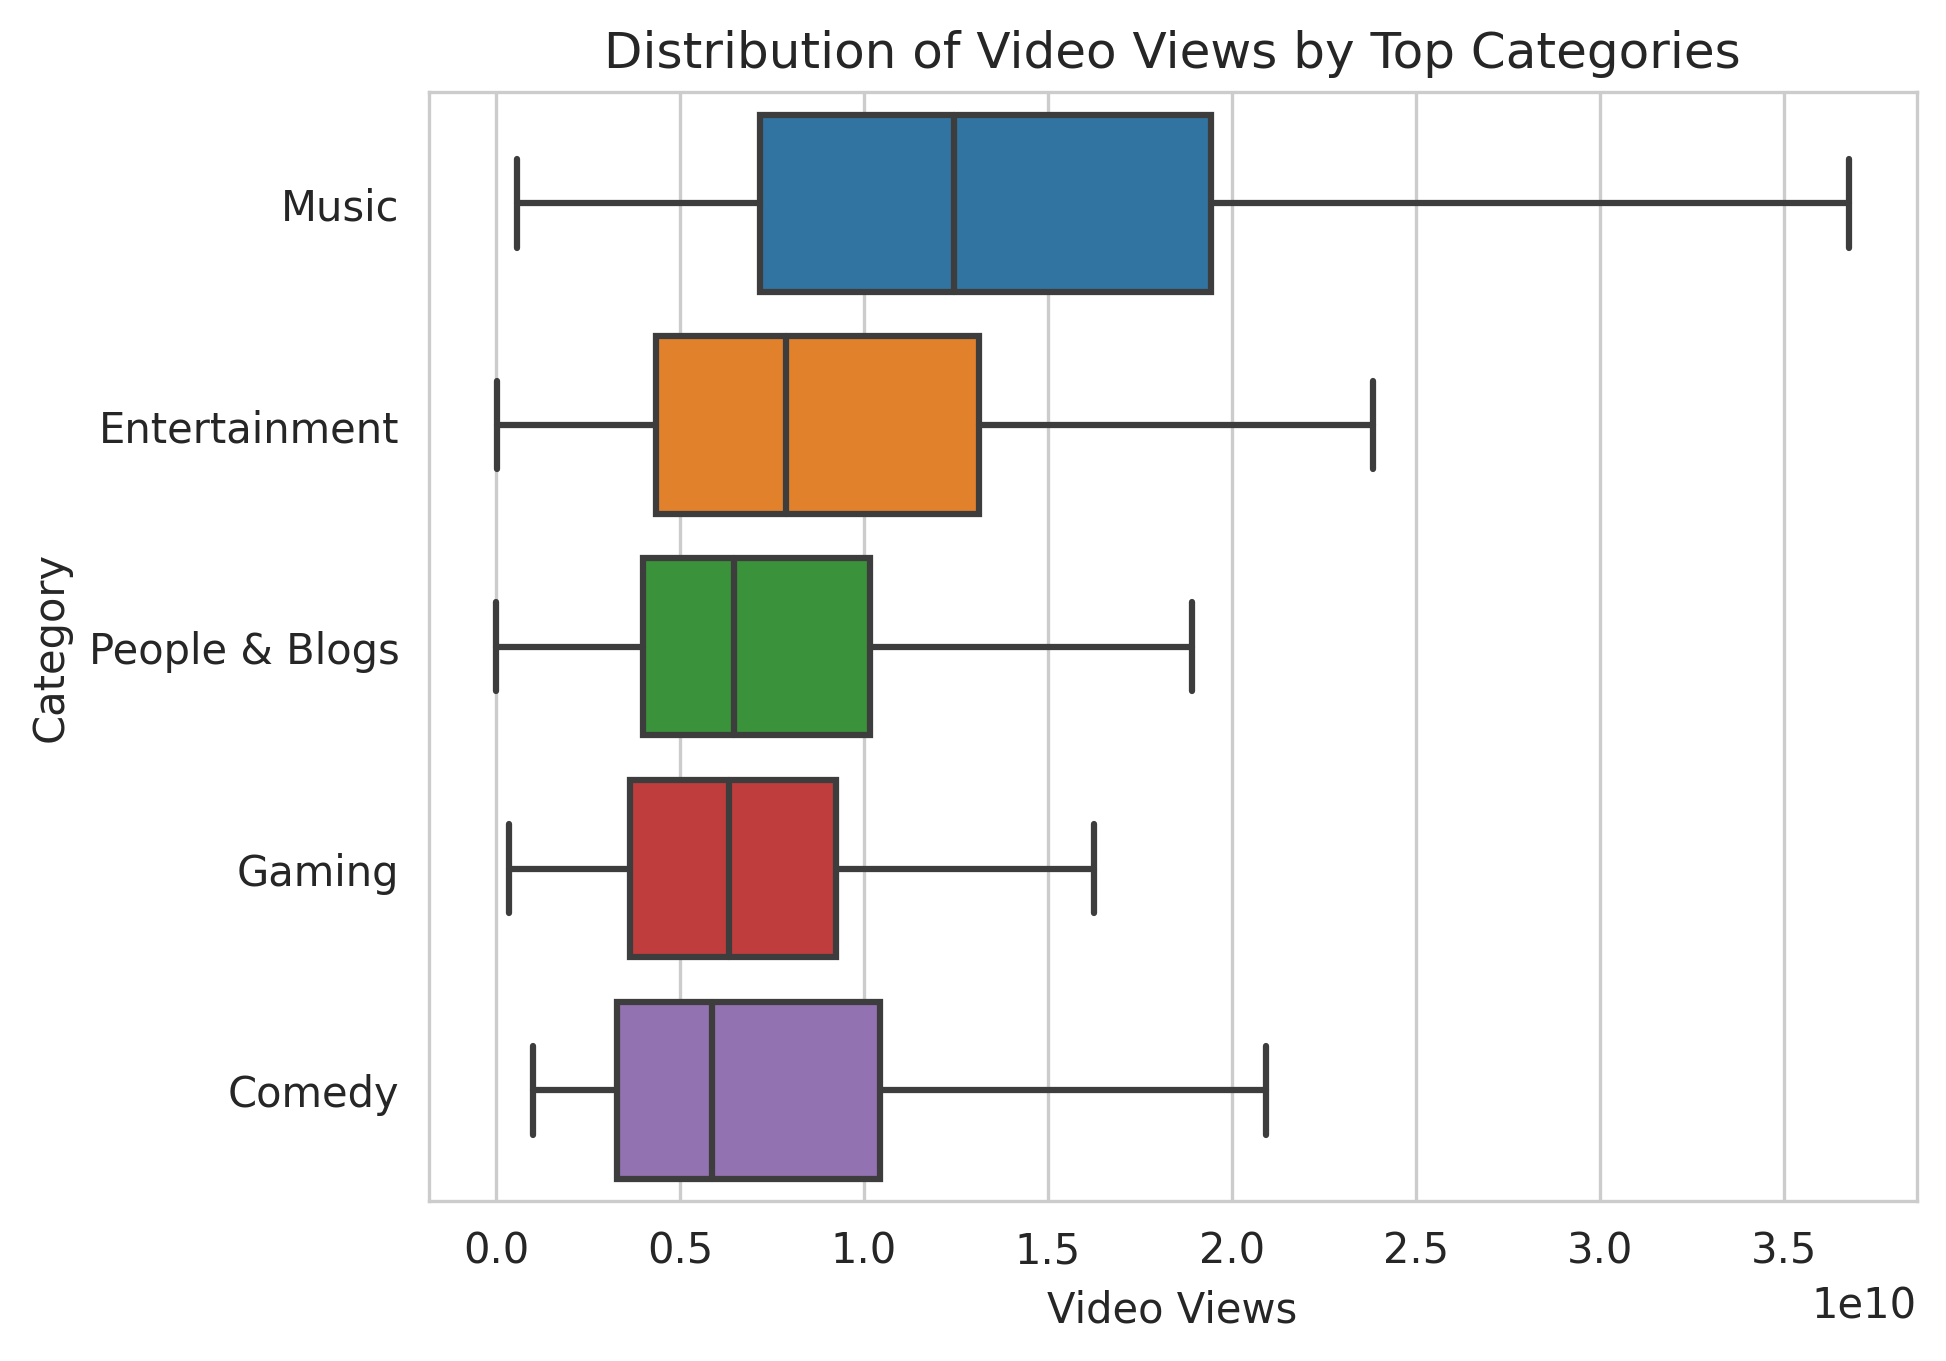

In [5]:
# Set style for seaborn plots
sns.set_style("whitegrid")
fig = plt.figure()
plt.figure(dpi=300)
# Create a figure with multiple subplots


# Plot 1: Top 10 categories by number of channels
sns.countplot(y='category', data=youtube_data, order=youtube_data['category'].value_counts().iloc[:10].index)
plt.title('Top 10 Categories by Number of Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Category')
plt.show()

# Plot 2: Distribution of the number of subscribers
fig = plt.figure()
plt.figure(dpi=300)
sns.histplot(youtube_data['subscribers'], bins=30, color='blue')
plt.title('Distribution of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Frequency')
plt.show()


# Plot 3: Relationship between the number of subscribers and the total video views
fig = plt.figure()
plt.figure(dpi=300)
sns.scatterplot(x='subscribers', y='video views', data=youtube_data, color='green')
plt.title('Subscribers vs. Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Video Views')
plt.show()

# Plot 4: Top 10 countries by the number of channels
fig = plt.figure()
plt.figure(dpi=300)
sns.countplot(y='Country', data=youtube_data, order=youtube_data['Country'].value_counts().iloc[:10].index)
plt.title('Top 10 Countries by Number of Channels')
plt.xlabel('Number of Channels')
plt.ylabel('Country')
plt.show()

# Plot 5: Distribution of video views by category for the top categories
fig = plt.figure()
plt.figure(dpi=300)
top_categories = youtube_data['category'].value_counts().iloc[:5].index
filtered_data = youtube_data[youtube_data['category'].isin(top_categories)]
sns.boxplot(y='category', x='video views', data=filtered_data, showfliers=False)
plt.title('Distribution of Video Views by Top Categories')
plt.xlabel('Video Views')
plt.ylabel('Category')
plt.show()

# Adjust layout
fig.tight_layout()

# Show the plots
plt.show()

**Top 10 Categories by Number of Channels:**
The category with the highest number of channels is "Entertainment," followed by "Music" and "Film & Animation."

**Distribution of Subscribers:**
Most channels have subscribers in the range of 10 million to 30 million. Few channels surpass 100 million subscribers.

**Subscribers vs. Video Views:**
There's a positive correlation between the number of subscribers and video views, which is expected. Channels with more subscribers tend to have more video views.

**Top 10 Countries by Number of Channels:**
The United States dominates with the highest number of channels, followed by India and Brazil.

**Distribution of Video Views by Top Categories:**
The "Music" category has the widest range of video views, indicating its popularity and diversity in viewership among channels. Other categories like "Entertainment" and "Film & Animation" also show significant viewership, but not as high as "Music."

# 4. Unemployment Rate vs Channel Categories

In [6]:
# Group by 'category' and get descriptive statistics for 'Unemployment rate'
unemployment_stats_by_category = youtube_data.groupby('category')['Unemployment rate'].describe()

unemployment_stats_by_category

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Autos & Vehicles,2.0,7.215000,6.880149,2.35,4.7825,7.215,9.6475,12.08
Comedy,67.0,9.492836,4.798998,0.75,5.3600,9.790,14.7000,14.70
Education,42.0,9.257857,4.820627,3.04,5.3600,5.360,14.7000,14.70
Entertainment,213.0,8.779765,4.967633,0.75,4.6900,5.560,14.7000,14.72
Film & Animation,36.0,9.687222,4.540436,3.32,5.3600,12.080,14.7000,14.70
Gaming,81.0,9.389877,4.947552,0.75,4.5900,9.790,14.7000,14.70
Howto & Style,33.0,9.345152,4.850642,3.20,5.2700,8.880,14.7000,14.70
Movies,2.0,5.360000,0.000000,5.36,5.3600,5.360,5.3600,5.36
Music,181.0,10.019669,4.750311,0.75,5.3600,12.080,14.7000,14.72


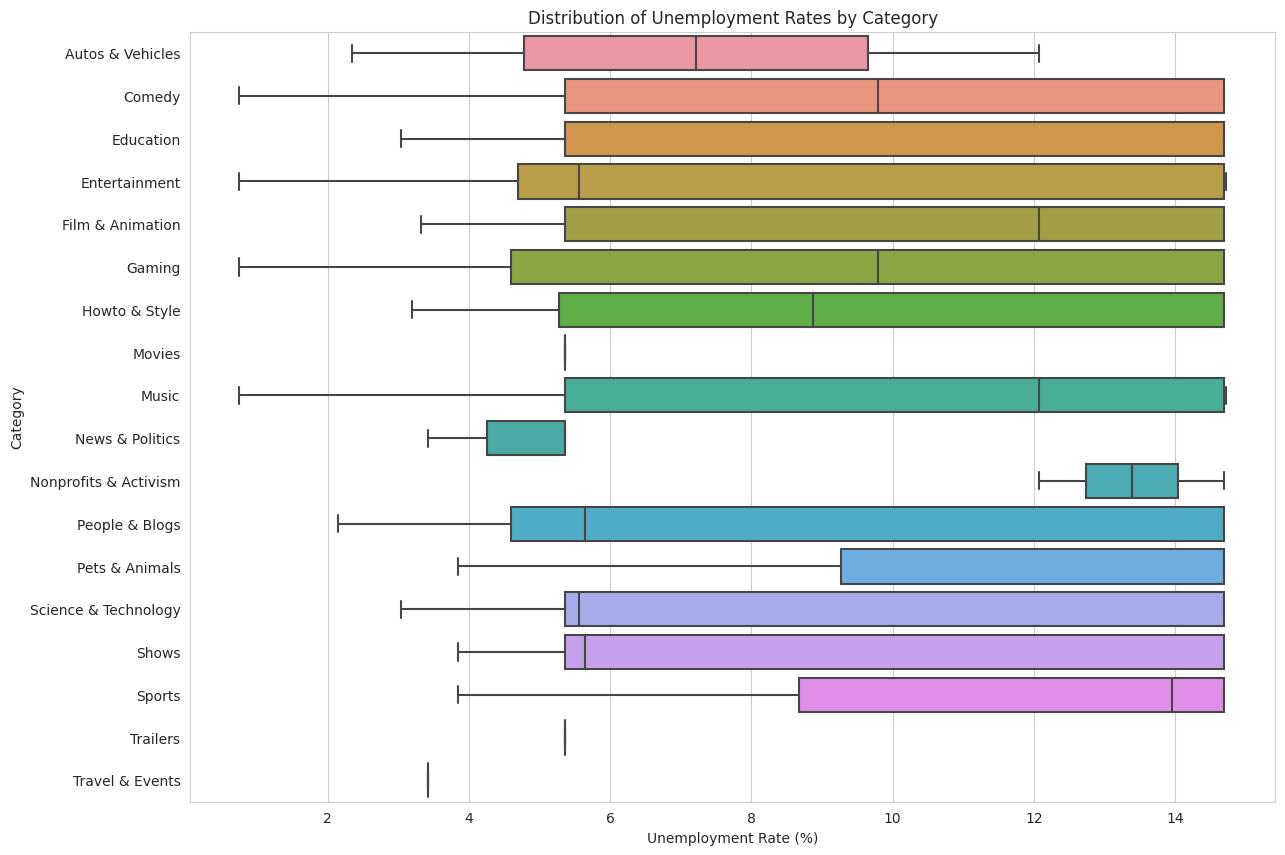

In [7]:
# Create a figure for the plots
plt.figure(figsize=(14, 10))

# Box plot for distribution of unemployment rates across categories
sns.boxplot(x='Unemployment rate', y='category', data=youtube_data, showfliers=False, order=unemployment_stats_by_category.index)
plt.title('Distribution of Unemployment Rates by Category')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Category')

# Display the plot
plt.show()

* The categories "Music", "Film & Animation", "Gaming", and "Howto & Style" have wider distributions, suggesting that channels in these categories come from a diverse set of countries with varying unemployment rates.

* Categories like "Travel & Events", "Trailers", and "Movies" have very limited variations, possibly due to fewer data points or channels from similar countries.

/tmp/ipykernel_33/1579099989.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Unemployment rate', y='category', data=youtube_data, ci=None, order=unemployment_stats_by_category.sort_values('mean', ascending=False).index)


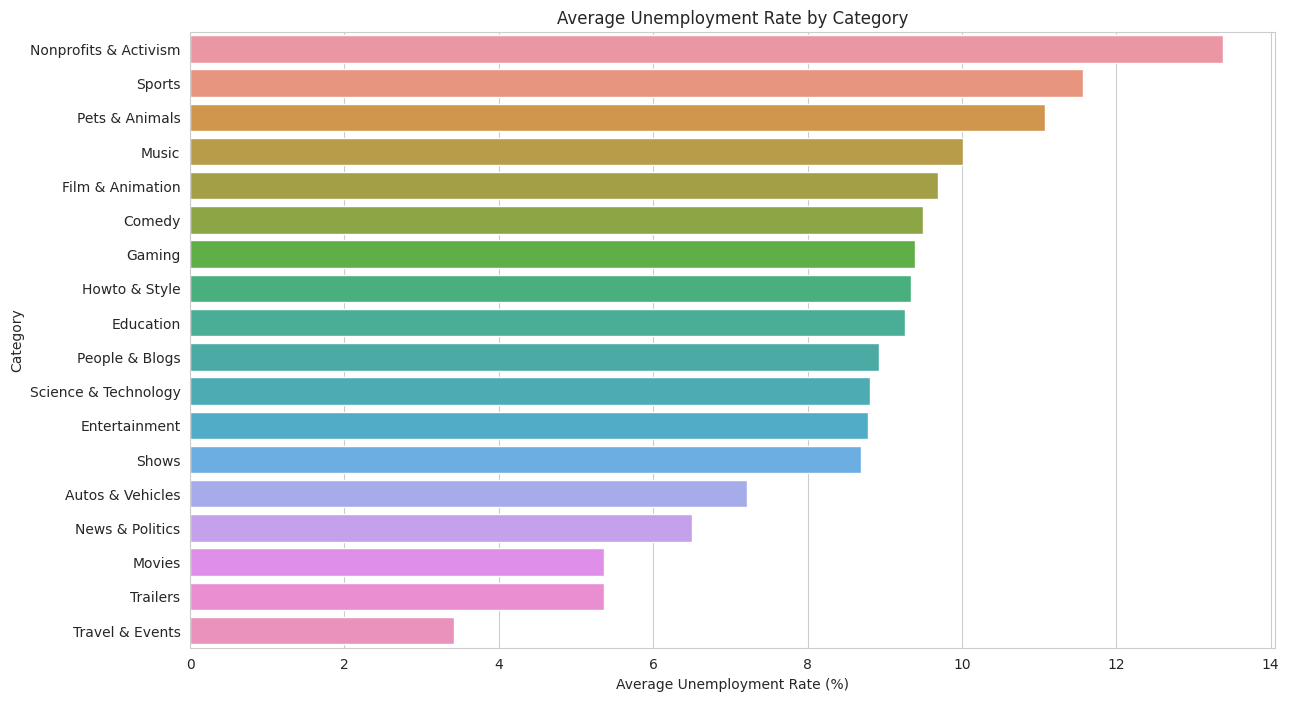

In [8]:
# Create a figure for the plots
plt.figure(figsize=(14, 8))

# Bar plot for average unemployment rate across categories
sns.barplot(x='Unemployment rate', y='category', data=youtube_data, ci=None, order=unemployment_stats_by_category.sort_values('mean', ascending=False).index)
plt.title('Average Unemployment Rate by Category')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Category')

# Display the plot
plt.show()

* The category "Nonprofits & Activism" has the highest average unemployment rate, followed closely by "Sports" and "Pets & Animals."
* On the other end, "Travel & Events", "Trailers", and "Movies" have the lowest average unemployment rates.
* There's quite a bit of variation in the unemployment rates across categories. This variation might be influenced by the countries from which the majority of channels in each category originate.

# 5. Number of Channels by Category for Each Country

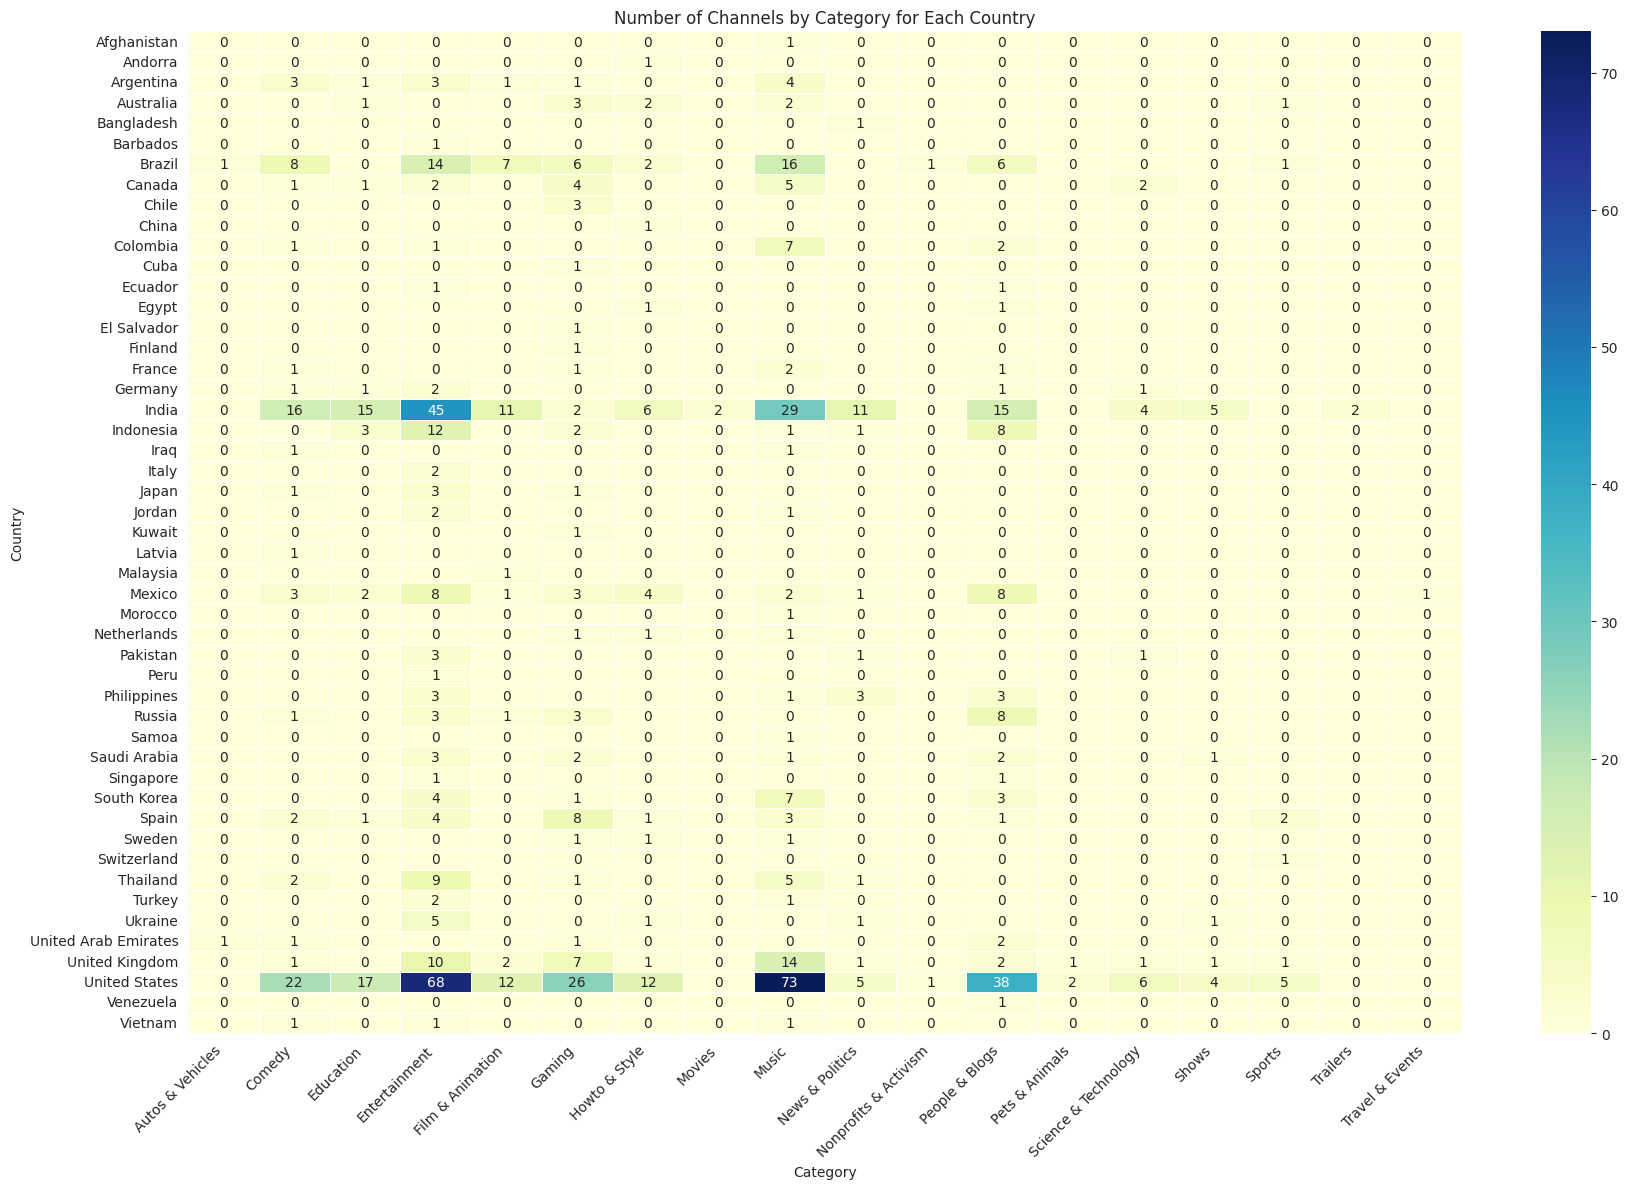

In [9]:
# Group by 'Country' and 'category' and count the number of channels in each group
country_category_counts = youtube_data.groupby(['Country', 'category']).size().unstack(fill_value=0)

# Create a heatmap to visualize the distribution
plt.figure(figsize=(18, 12))
sns.heatmap(country_category_counts, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Number of Channels by Category for Each Country')
plt.xlabel('Category')
plt.ylabel('Country')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


* The United States has a diverse set of categories with high counts in "Entertainment", "Music", and "People & Blogs".
* India has a significant number of channels in the "Music" category.
* Brazil also shows a strong presence in the "Music" and "Entertainment" categories.
* Several countries, such as Australia and Canada, have a balanced distribution across multiple categories.

# 6. Average Max. Yearly Earnings by Category

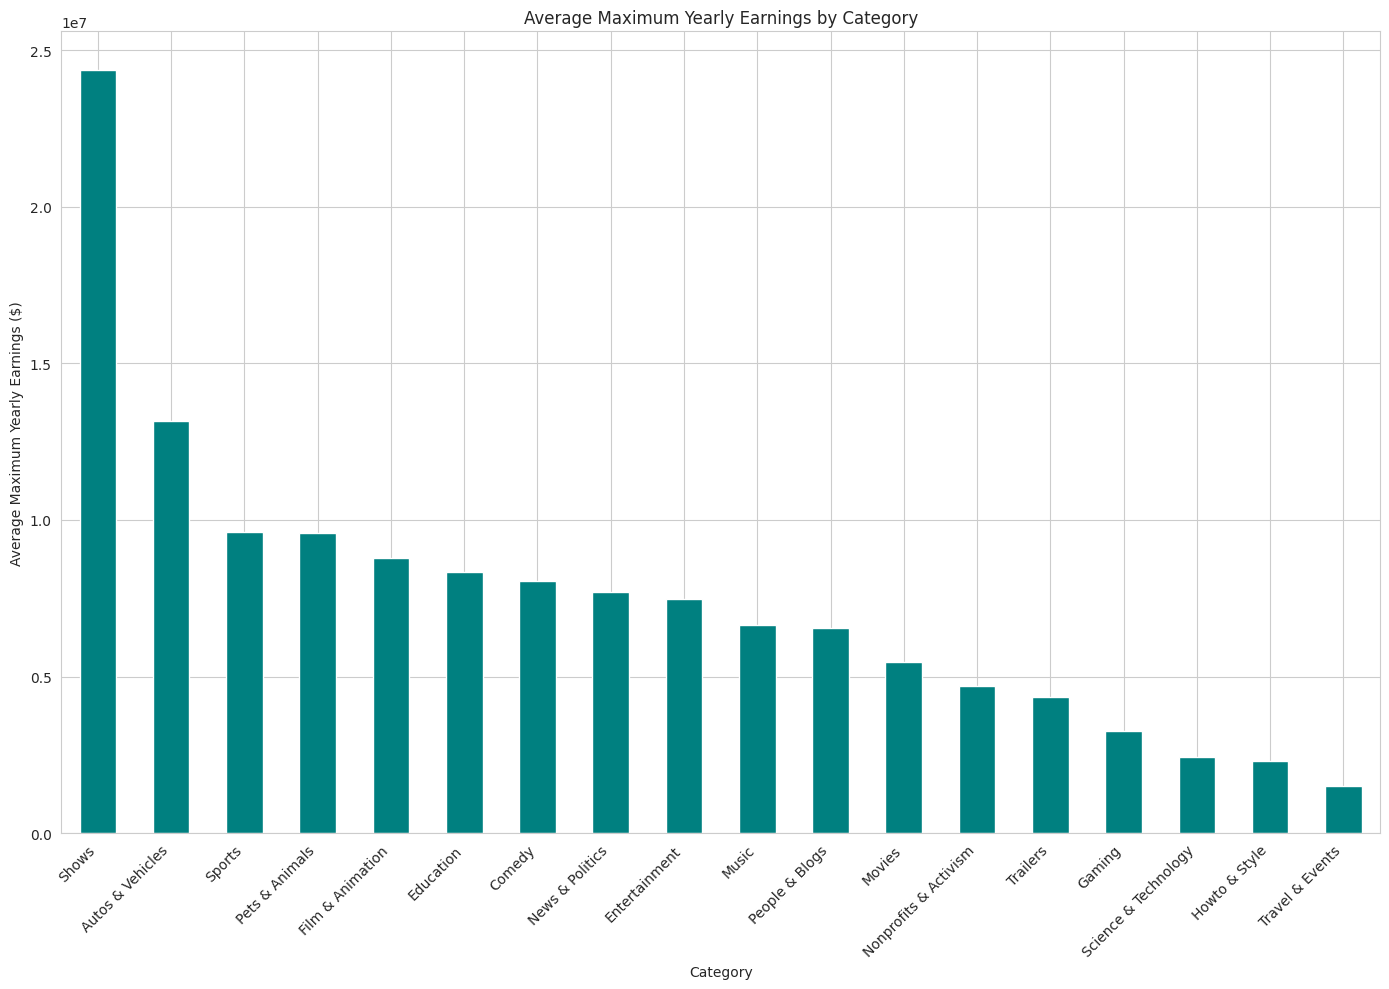

In [10]:
# Convert the 'highest_yearly_earnings' column to numeric, ensuring non-numeric values are set to NaN
youtube_data['highest_yearly_earnings'] = pd.to_numeric(youtube_data['highest_yearly_earnings'], errors='coerce')

# Group by 'category' and calculate the mean of 'highest_yearly_earnings'
avg_earnings_by_category = youtube_data.groupby('category')['highest_yearly_earnings'].mean().sort_values(ascending=False)

# Create a bar plot to visualize the results
plt.figure(figsize=(14, 10))
avg_earnings_by_category.plot(kind='bar', color='teal')
plt.title('Average Maximum Yearly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('Average Maximum Yearly Earnings ($)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

# 7. Education vs. Video Views

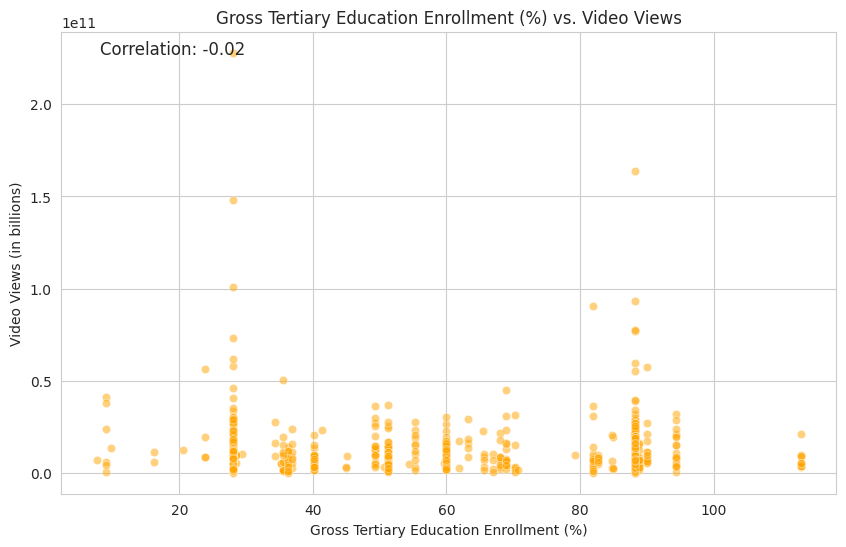

-0.015231700222535267

In [11]:
# Convert 'Gross tertiary education enrollment (%)' column to numeric, ensuring non-numeric values are set to NaN
youtube_data['Gross tertiary education enrollment (%)'] = pd.to_numeric(youtube_data['Gross tertiary education enrollment (%)'], errors='coerce')

# Calculate correlation between 'Gross tertiary education enrollment (%)' and 'video views'
education_correlation = youtube_data['Gross tertiary education enrollment (%)'].corr(youtube_data['video views'])

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross tertiary education enrollment (%)', y='video views', data=youtube_data, color='orange', alpha=0.5)
plt.title('Gross Tertiary Education Enrollment (%) vs. Video Views')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Video Views (in billions)')
plt.annotate(f"Correlation: {education_correlation:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

# Display the plot
plt.show()

education_correlation

* The correlation coefficient is approximately −0.015, indicating a very weak negative correlation between tertiary education enrollment and video views. This means that there's barely any relationship between the percentage of people enrolled in tertiary education in a country and the video views of channels from that country.
* The data points are scattered throughout the graph without a discernible pattern, further confirming the lack of a strong relationship between the two variables.